# EDA

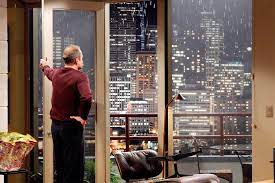

In [27]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
df_import = pd.read_csv('data/King_County_House_prices_dataset.csv')
df_import.shape

(21597, 21)

In [29]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [30]:
df_import.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
df_import['date'] = pd.to_datetime(df_import['date'], format='%m/%d/%Y')  #%Y/%m/%d  we should arrage the date according to arrage of was come 

In [34]:
df_import.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [35]:
type(df_import['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df_import.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [9]:
df_import.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [36]:
df_import.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<AxesSubplot:>

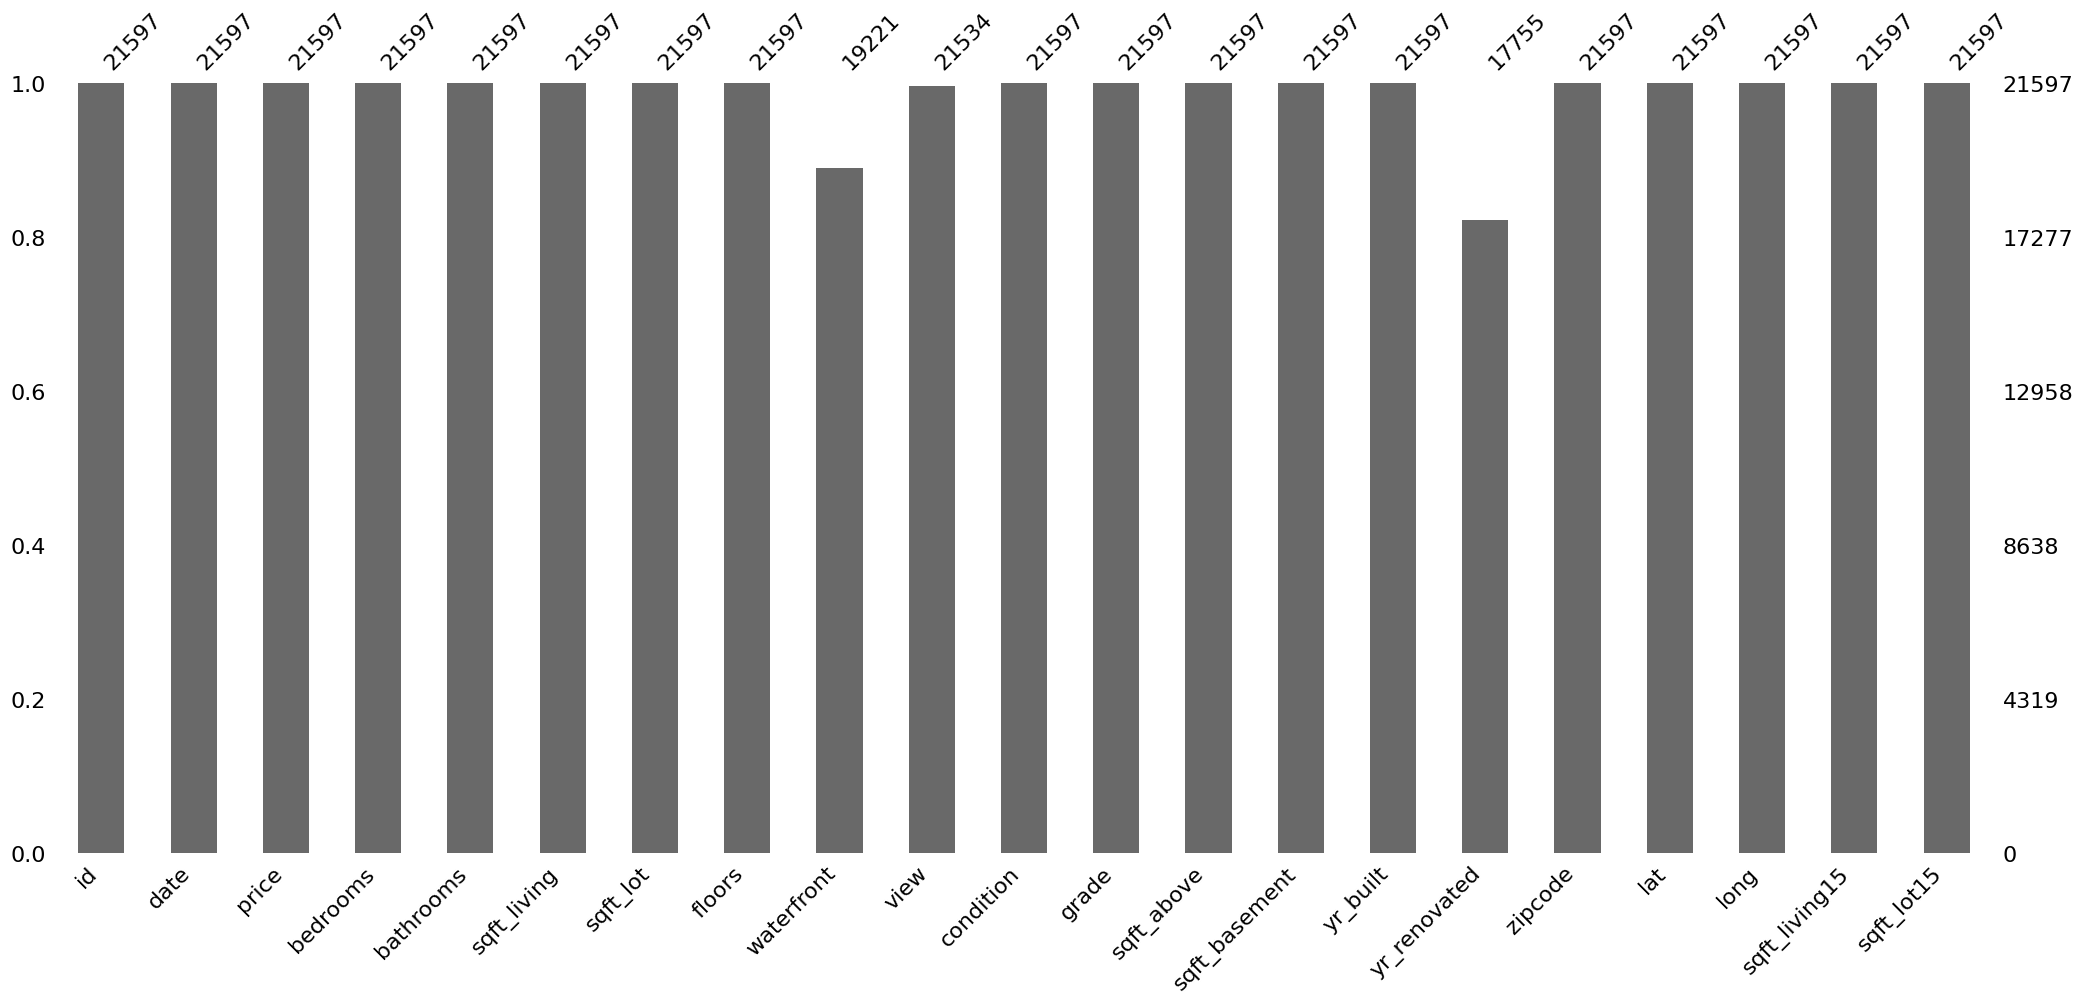

In [38]:
import missingno as msno
msno.bar(df_import)

In [53]:
value_2=df_import['yr_renovated'].isna().sum()/len(df_import['yr_renovated'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 17.79 %


In [54]:
value_2=df_import['waterfront'].isna().sum()/len(df_import['waterfront'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 11.0 %


In [55]:
value_2=df_import['view'].isna().sum()/len(df_import['view'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 0.29 %


In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("data_group_work/airports.csv")

namelist = [f'IATA: {df["iata"][x]}<br>Name: {df["name"][x]}<br>State: {df["state"][x]}' for x in range(len(df))] # We need this later for the 'text'-argument in go.Scattergeo() to make the labels look nicer.

fig = go.Figure(

go.Scattergeo(
        locationmode = 'USA-states', 
        lon = df['longitude'],
        lat = df['latitude'],
        text = namelist,
        mode = 'markers',
        marker = dict( # controls the points
            size = 2,
            color = 'red',
            opacity = 1
        )
    ))


fig.update_layout(
         title_text = 'Map of all the airports in the US',
         showlegend = False,
         margin={"r":0,"t":50,"l":0,"b":0},
         geo = dict(
             scope = 'usa',
             landcolor = 'rgb(217, 217, 217)'
             
         )
     )

fig.show()


In [56]:
import plotly.express as px
import pandas as pd

# create a sample dataframe with zipcode, longitude and latitude data
df = pd.DataFrame({'Zipcode': [10001, 10002, 10003, 10004],
                   'Longitude': [-73.9884, -73.9865, -73.9882, -74.0124],
                   'Latitude': [40.7488, 40.7221, 40.7318, 40.7040]})

# create a scatter plot with zipcode as the text label for each point
fig = px.scatter(df, x='Longitude', y='Latitude', text='Zipcode')

# customize the layout
fig.update_layout(title='Zipcode Data with Longitude and Latitude',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')

# show the plot
fig.show()


My stakholder Charles Christensen selling   his/her persective for  Invest with big returns, wondering about renovation?, which Neighborhood? Timing?

And more care about time because time mean return investment 
## question 
* Dose year or month or days affect selling     
....then Hypothesie which best months or day of sell
* Dose renovation of house affect  selling  .......then Hypothesie renovated good or bad renovated 
* Dose the location for zipcode and latitude and longitude affect selling ...then Hypothesie which place locations near to center or outskirt 
     
